In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [6]:
df = pd.read_csv("../data/adult.csv")
df = df.replace("?", np.nan)

df = df[df["salary"].isin(["<=50K", ">50K"])]
df["salary K$"] = df["salary K$"].astype(str)
df = df[df["salary K$"].str.isnumeric()]

df.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


# Task 1
Print the count of men and women in the dataset.

In [8]:
sex_count = df["sex"].value_counts()
sex_count

sex
Male      21790
Female    10771
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [12]:
avg_men_age = df[df["sex"] == "Male"]["age"].mean()
avg_men_age

np.float64(39.43354749885268)

# Task 3
Get the percentage of people from Poland (native-country)

In [16]:
poland_rectangle = (df[df["native-country"] == "Poland"].shape[0] / df.shape[0]) * 100
poland_rectangle

0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [18]:
mean_age_greater_50K = df[df["salary"] == ">50K"]["age"].mean()
std_age_greater_50K = df[df["salary"] == ">50K"]["age"].std()

mean_age_lessequal_50K = df[df["salary"] == "<=>50K"]["age"].mean()
std_age_lessequal_50K = df[df["salary"] == "<=50K"]["age"].std()

print(f"Mean age for people earning >50K: {mean_age_greater_50K:.2f}")
print(f"Standard deviation of age for people earning >50K: {std_age_greater_50K:.2f}")
print(f"Mean age for people earning <=50K: {mean_age_lessequal_50K:.2f}")
print(f"Standard deviation of age for people earning <=50K: {std_age_lessequal_50K:.2f}")

Mean age for people earning >50K: 44.25
Standard deviation of age for people earning >50K: 10.52
Mean age for people earning <=50K: nan
Standard deviation of age for people earning <=50K: 14.02


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [19]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
high_income = df[df["salary"] == ">50K"]
people_with_higher_education = high_income[~high_income["education"].isin(higher_education)]
people_with_higher_education

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
27,27,54,NaN,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,60,South,>50K,275
38,38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,NaN,>50K,166
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32510,32510,39,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,NaN,>50K,212
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [20]:
education_stats = df.groupby("education")["age"].describe()
education_stats

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [21]:
def is_married(status):
    return status.startswith("Married")

df["is_married"] = df["marital-status"].apply(is_married)
men_data = df[df["sex"] == "Male"]

married_salaries = men_data[men_data["is_married"]]
non_married_salaries = men_data[~men_data["is_married"]]

married_salary_counts = married_salaries["salary"].value_counts()
non_married_salary_counts = non_married_salaries["salary"].value_counts()

print("Married Men Salaries:")
print(married_salary_counts)
print("\nNon-Married Men Salaries:")
print(non_married_salary_counts)

Married Men Salaries:
salary
<=50K    7576
>50K     5965
Name: count, dtype: int64

Non-Married Men Salaries:
salary
<=50K    7552
>50K      697
Name: count, dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [25]:
max_hours_per_week = df["hours-per-week"].max()
num_people_max_hours_per_week = df[df["hours-per-week"] == max_hours_per_week].shape[0]
print(f"Max hours per week: {max_hours_per_week}")
print(f"Num people max hours per week: {num_people_max_hours_per_week}")

Max hours per week: 99
Num people max hours per week: 85


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

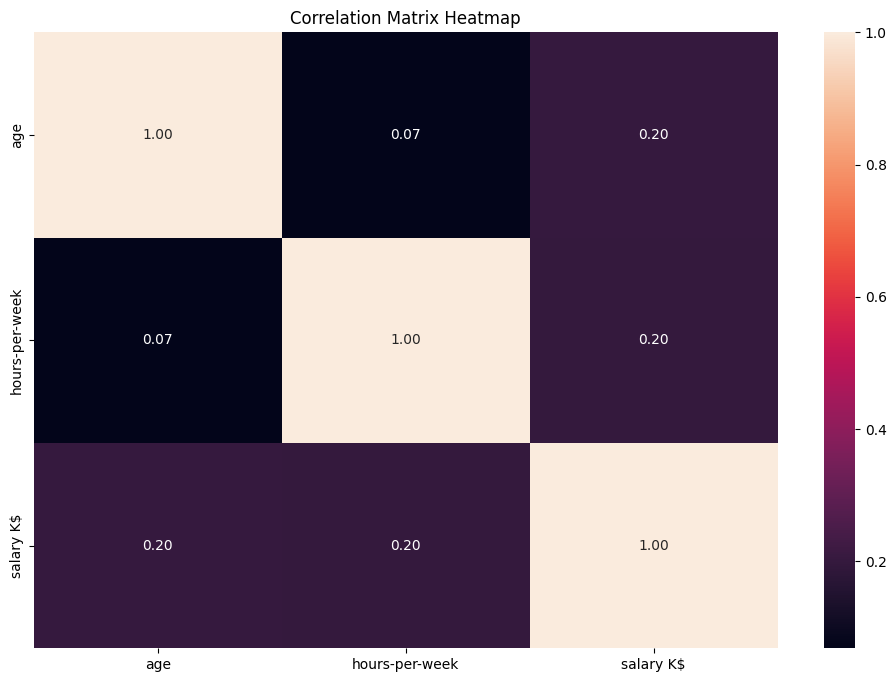

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(df, columns=["age", "hours-per-week", "salary K$"])
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()